<a href="https://colab.research.google.com/github/burrrata/apodopa-roadmap/blob/master/APOD_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import stuff
import urllib2
from bs4 import BeautifulSoup

### Get APOD Page URLs 

In [0]:
# init scraping params
url_list = []
apod_archive_url = 'https://apod.nasa.gov/apod/archivepix.html'
apod_page_url = urllib2.urlopen(apod_archive_url).read()
soup = BeautifulSoup(apod_page_url, 'html5lib')
soup.prettify()
# find the anchors on the page
for anchor in soup.find_all('a'):
    link = anchor.get('href')
    if link[1] == 'p': # filters out urls that are not APOD pages
        url_list.append(link)
# write the url array to a .txt file 
with open('apod_archive_pages.txt', 'w') as f:
    for item in url_list:
        f.write("%s\n" % item)
print 'Wrote the file'

Wrote the file


### Get APOD Image URLs


In [0]:
# init params
img_url_list = []
total = 99

# write the scraping function
def get_APOD_image_URLs():
    # create an array from the APOD pages text file
    text_file = open('apod_archive_pages.txt')
    apod_urls = text_file.read().split()
    # go to each APOD page and get the image URL
    count = 0
    for url in apod_urls:
        new_url = 'https://apod.nasa.gov/apod/' + url
        open_url = urllib2.urlopen(new_url).read()
        soup2 = BeautifulSoup(open_url, 'html5lib')
        soup2.prettify()
        for img in soup2.find_all('img'):
            img_url = img['src']
            if img_url[len(img_url)-1] == 'g': # filter out urls that are not jpg
                img_url_list.append('https://apod.nasa.gov/apod/' + img_url)
                count += 1
                # the NASA APOD public API rate limits 1000 requests per hour
                # I got 4-5k without an API key, but the official limit is 1000
                # https://api.nasa.gov/api.html#authentication
                if count % (total / 10) == 0:
                    print count
                # for my app 99 images is more than enough
                if count == total:
                    return 
                  
# Run the function
get_APOD_image_URLs()

# Write the url array to a .txt file 
with open('apod_image_urls.txt', 'w') as f:
    for item in img_url_list:
        f.write("%s\n" % item)
print 'Wrote the file'

9
18
27
36
45
54
63
72
81
90
99
Wrote the file


### Download the images

In [0]:
urls_file = open('apod_image_urls.txt')
apod_image_urls = urls_file.read().split()
for url in apod_image_urls:
  ! wget $url -P ./APOD/

--2019-04-18 01:59:44--  https://apod.nasa.gov/apod/image/1904/M81salvatore1024.jpg
Resolving apod.nasa.gov (apod.nasa.gov)... 129.164.179.22, 2001:4d0:2310:150::22
Connecting to apod.nasa.gov (apod.nasa.gov)|129.164.179.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 491081 (480K) [image/jpeg]
Saving to: ‘./APOD/M81salvatore1024.jpg’

M81salvatore1024.jp 100%[===================>] 479.57K  2.07MB/s    in 0.2s    

2019-04-18 01:59:44 (2.07 MB/s) - ‘./APOD/M81salvatore1024.jpg’ saved [491081/491081]

--2019-04-18 01:59:46--  https://apod.nasa.gov/apod/image/1904/ConeFoxfur_Mishra_960.jpg
Resolving apod.nasa.gov (apod.nasa.gov)... 129.164.179.22, 2001:4d0:2310:150::22
Connecting to apod.nasa.gov (apod.nasa.gov)|129.164.179.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 215127 (210K) [image/jpeg]
Saving to: ‘./APOD/ConeFoxfur_Mishra_960.jpg’

ConeFoxfur_Mishra_9 100%[===================>] 210.08K  1.20MB/s    in 0.2s    

2019-04

# Do Stuff With The Images

### Feature extraction and reverse image search
- https://github.com/ml4a/ml4a-guides/blob/f83082e46b148e29d129f655d3218bc3cf1dd5c1/notebooks/image_search.ipynb

In [2]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

Using TensorFlow backend.


In [4]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)
model.summary()

APOD  apod_archive_pages.txt  apod_image_urls.txt  sample_data
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

('shape of x: ', (1, 224, 224, 3))
('data type: ', dtype('float32'))


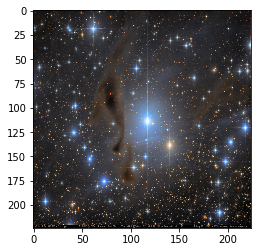

In [8]:
img, x = load_image("APOD/20181013VDB9kerschhuber1024.jpg")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [9]:
# forward the image through the network
predictions = model.predict(x)

# print out the 
for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))

49152/35363 [=========================================] - 0s 0us/step
predicted fountain with probability 0.432
predicted jellyfish with probability 0.123
predicted window_screen with probability 0.100
predicted bubble with probability 0.059
predicted spider_web with probability 0.027


In [10]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

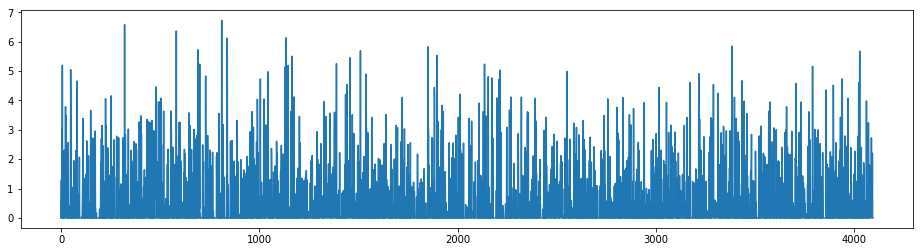

In [11]:
img, x = load_image("APOD/20181013VDB9kerschhuber1024.jpg")
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [13]:
images_path = 'APOD'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 99 images to analyze


In [17]:
import time
tic = time.clock()


features = []
for i, image_path in enumerate(images):
    if i % (len(images) /10) == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

analyzing image 0 / 99. Time: 0.0006 seconds.
analyzing image 9 / 99. Time: 8.5387 seconds.
analyzing image 18 / 99. Time: 10.4469 seconds.
analyzing image 27 / 99. Time: 10.4017 seconds.
analyzing image 36 / 99. Time: 10.3521 seconds.
analyzing image 45 / 99. Time: 10.3777 seconds.
analyzing image 54 / 99. Time: 10.3826 seconds.
analyzing image 63 / 99. Time: 10.3883 seconds.
analyzing image 72 / 99. Time: 10.3980 seconds.
analyzing image 81 / 99. Time: 10.4100 seconds.
analyzing image 90 / 99. Time: 10.4071 seconds.
finished extracting features for 99 images


In [0]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=30)
pca.fit(features)
pca_features = pca.transform(features)

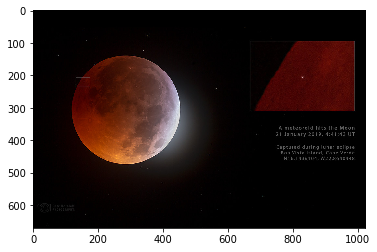

In [23]:
import random

# grab a random query image
query_image_idx = int(len(images) * random.random())

# let's display the image
img = image.load_img(images[query_image_idx])
plt.imshow(img)

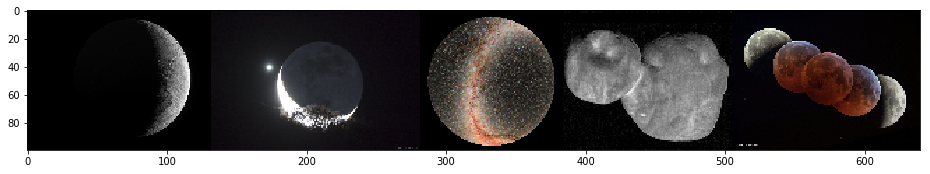

In [24]:
from scipy.spatial import distance

similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]

# load all the similarity results as thumbnails of height 100
thumbs = []
for idx in idx_closest:
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

In [0]:
def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image


Text(0.5,1,'result images')

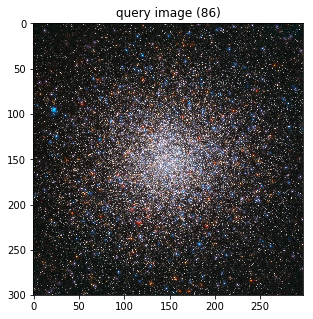

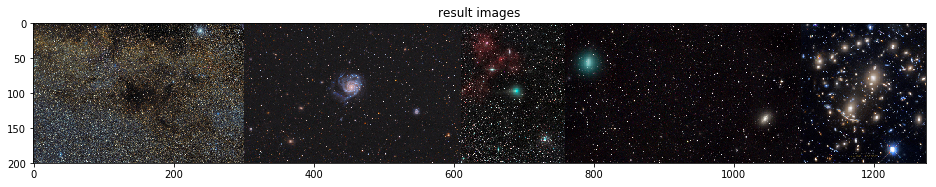

In [27]:
# do a query on a random image
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

Text(0.5,1,'result images')

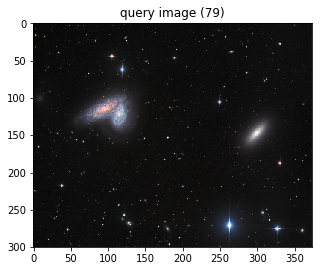

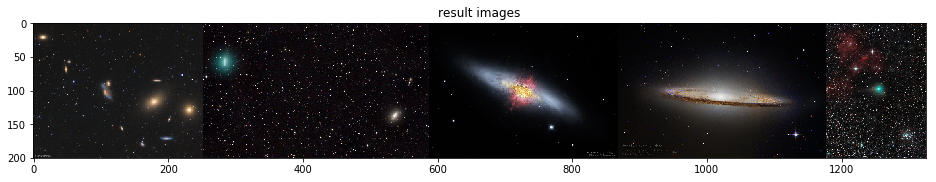

In [28]:
# do a query on a random image
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

--2019-04-18 02:24:31--  https://apod.nasa.gov/apod/image/1904/M81salvatore.jpg
Resolving apod.nasa.gov (apod.nasa.gov)... 129.164.179.22, 2001:4d0:2310:150::22
Connecting to apod.nasa.gov (apod.nasa.gov)|129.164.179.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3426188 (3.3M) [image/jpeg]
Saving to: ‘M81salvatore.jpg’

M81salvatore.jpg    100%[===================>]   3.27M  2.80MB/s    in 1.2s    

2019-04-18 02:24:33 (2.80 MB/s) - ‘M81salvatore.jpg’ saved [3426188/3426188]



Text(0.5,1,'result images')

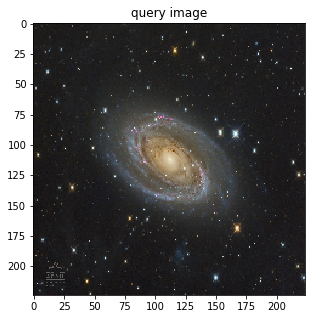

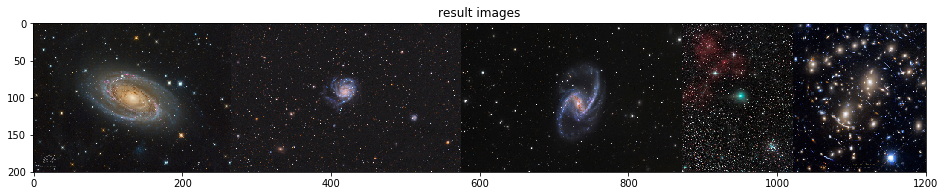

In [31]:
# load image and extract features
! wget https://apod.nasa.gov/apod/image/1904/M81salvatore.jpg
new_image, x = load_image("M81salvatore.jpg")
new_features = feat_extractor.predict(x)

# project it into pca space
new_pca_features = pca.transform(new_features)[0]

# calculate its distance to all the other images pca feature vectors
distances = [ distance.cosine(new_pca_features, feat) for feat in pca_features ]
idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:5]  # grab first 5
results_image = get_concatenated_images(idx_closest, 200)

# display the results
plt.figure(figsize = (5,5))
plt.imshow(new_image)
plt.title("query image")

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")